## Simple machine-learning program using KNN

### Data Representation (`matplotlib`)

In [ ]:
import matplotlib.pyplot as plt

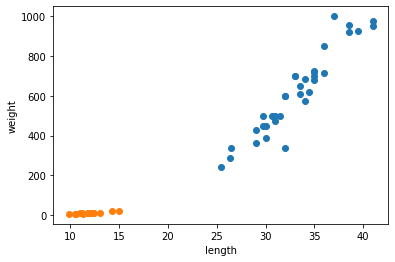

In [ ]:
# Preparing data
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# Preparing data as 2-dimensional list

length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

fish_target = [1] * 35 + [0] * 14 #binary classfication(1 for bream, 0 for smelt)
print(fish_target)


[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### K-Nearest-Neighbors Algorithm (`sklearn.neighbors`)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

#print(kn._fit_X)
#print(kn._y)


1.0

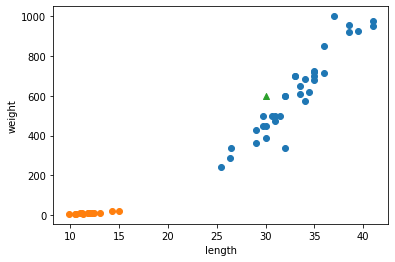

array([1])

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.predict([[30, 600]])


In [ ]:
#knn using all given fish data (49)
kn49 = KNeighborsClassifier(n_neighbors=49) # Default is 5
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target) #always classified as bream (35 out of 49)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


In [ ]:
for n in range(5, 50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if(score < 1):
    print(n, score)
    break

18 0.9795918367346939


In [ ]:
kn = KNeighborsClassifier()

### Sampling Bias

In [ ]:
# Slicing/Splitting data into train and test data
train_input = fish_data[:35]
train_target = fish_target[:35]
kn = kn.fit(train_input, train_target)

test_input = fish_data[:35]
test_target = fish_target[:35]
print(kn.score(test_input, test_target))

test_input = fish_data[35:]
test_target = fish_target[35:]
print(kn.score(test_input, test_target))

1.0
0.0


#### Retrieving train and test data without sampling bias using Numpy (`np.random.shuffle`)

In [ ]:
import numpy as np

(49, 2)
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


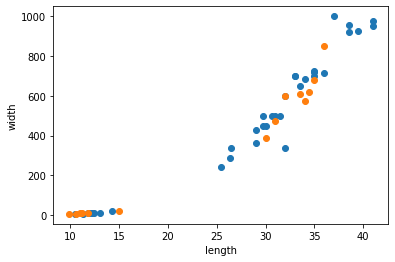

1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# Transforming list to numpy array
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
#print(input_arr)
#print(target_arr)
print(input_arr.shape) #(NumOfSample, NumofFeatures)

# Shuffling indices
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index) # shuffeld indices

# Slicing/Splitting data into train and test data
train_input = input_arr[index[:35]] # Passing numpy array as index (array indexing)
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('width')
plt.show()

kn = kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))
print(kn.predict(test_input))

test_target

### Data Preprocessing

In [ ]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

# Preparing data as 2-dimensional list (np.column_stack)
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

#### Retrieving train and test data (`train_test_split`)

In [ ]:
from sklearn.model_selection import train_test_split

# Default: test_size = 0.25, shuffle = True
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

1.0
[0.]
[[1. 0. 0. 0. 0.]]


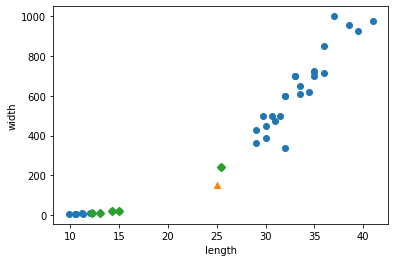

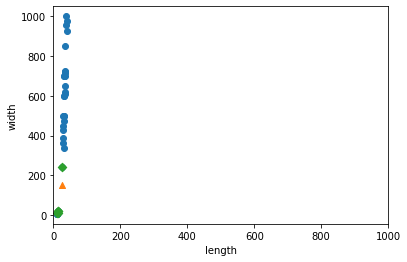

In [ ]:
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target)) # accuracy as 100%

print(kn.predict([[25, 150]])) # supposed to be 1(Bream), but 0(Smelt)

# Getting nearest (5) Neighbors to the sample (25, 150) from train sample
distances, indexes = kn.kneighbors([[25, 150]])
print(train_target[indexes]) # array indexing

# Unnormalized scatter plot
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') # array indexing!
plt.xlabel('length')
plt.ylabel('width')
plt.show()

# Matching x-axis scale to y-axis(1000)
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') # array indexing!
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('width')
plt.show()

#### Pre-Processing using Standard Score (Z-Score)
$z = \frac{x - \mu}{\sigma}$

$\mu$ : mean,
$\sigma$ : standard derivition

1.0
[1.]
[[1. 0. 0. 0. 0.]]


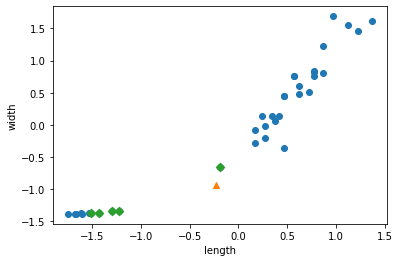

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

# Pre-Process train and test data
train_scaled = (train_input - mean) / std # numpy broadcasting
test_scaled = (test_input - mean) / std

# Normalizing the sample (25, 150) as well
new = ([25, 150] - mean) / std

# Train model with processed data
kn.fit(train_scaled, train_target)

print(kn.score(test_scaled, test_target))
print(kn.predict([new])) # correct prediction

# Getting nearest (5) Neighbors
distances = kn.kneighbors([new], return_distance=False)
print(train_target[indexes]) # array indexing

# Normalized scatter plot
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('width')
plt.show()


### KNN-Regression Algorithm ([$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions) Score)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

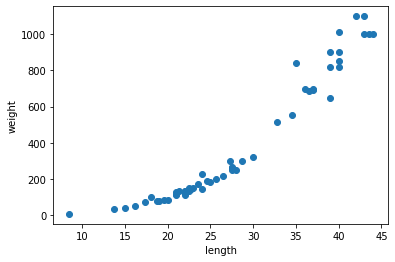

In [ ]:
# preparing data
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# Transform input array(length as the only feature) to 2-dimensional array using reshape()
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


In [ ]:
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

#### Mean Absolute Error

In [ ]:
# MAE score from test
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


#### Overfitting and Underfitting

In [ ]:
# Compare R^2 scores from train and test sets

# Underfitting (train score < test score)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
print()

# Reduce underfitting by making the model "more complicated"
knr.n_neighbors = 3 # Reduce n_neighbors (more tendency to smaller patterns)
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064

0.9804899950518966
0.9746459963987609


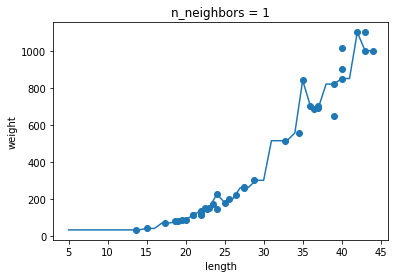

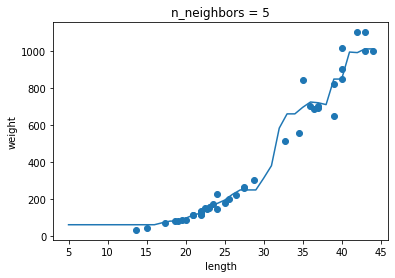

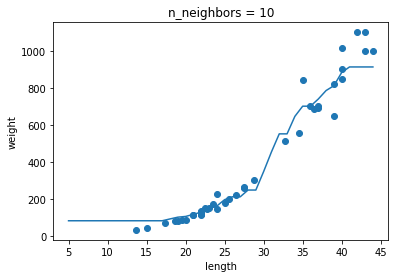

In [ ]:
knr = KNeighborsRegressor()
# test_input in range 5 and 45
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

#### Limitation of KNR
- Constant update with new data
- Better algorithms to learn patterns of data

[1033.33333333]
[1033.33333333]
[1033.33333333]
1033.3333333333333


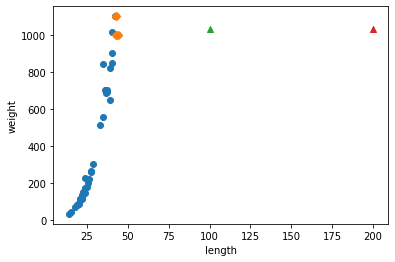

In [ ]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))
print(knr.predict([[100]]))
print(knr.predict([[200]]))

indexes = knr.kneighbors([[50]], return_distance=False)
print(np.mean(train_target[indexes]))

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.scatter(200, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### Multiclass Classification

In [ ]:
# Preparing Data using Pandas
import pandas as pd

In [ ]:
# Preparing panda data frame by importing csv file (read_csv())
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish.head() # print first 5 rows

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species'])) # get fish species (target feature)

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # list(array) indexing
print(fish_input[:5])
fish_target = fish['Species'].to_numpy()

# Retrieving train and test data
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# Preprocessing data (Regularization)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.classes_) # Classes ordered alphabetically

# Compare scores (accuracy) from train and test sets
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

# Predict first 5 test samples
print(kn.predict(test_scaled[:5]))

# Prediction Probability
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

# Check probability for 5th sample
indexes = kn.kneighbors(test_scaled[4:5, :], return_distance=False) # use slicing to pass 2 dimensional array
print(train_target[indexes])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
0.8907563025210085
0.85
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Perch' 'Perch' 'Roach']]
